In [20]:
from pathlib import Path
from pystripe.core import imread_tif_raw, imsave_tif
from process_images import align_images
from numpy import zeros
from skimage.transform import resize
from skimage.filters import sobel, prewitt, scharr, roberts, farid
from skimage.registration import optical_flow_tvl1
from skimage.transform import warp
from skimage.filters import sobel, prewitt, scharr, roberts, farid
from sklearn.preprocessing import minmax_scale
import numpy as np
import matplotlib.pyplot as plt
from pystripe.core import filter_streaks
rc = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "xtick.bottom": False,
    "xtick.labelbottom" : False,
    "ytick.labelleft": False,
    "ytick.left": False,
    "figure.figsize": [20, 10],
    "figure.dpi": 200 
}
plt.rcParams.update(rc)
color1 = Path(r"Y:\3D_stitched\20220331_SW220203_04_LS_6x_1000z\Ex_561_Em_600_tif")
color2 = Path(r"Y:\3D_stitched\20220331_SW220203_04_LS_6x_1000z\Ex_642_Em_680_tif")
file = "img_003000.tif"
img1 = imread_tif_raw(color1/file)
img2 = imread_tif_raw(color2/file)
img1 = resize(img1, img2.shape, preserve_range=True, anti_aliasing=True)

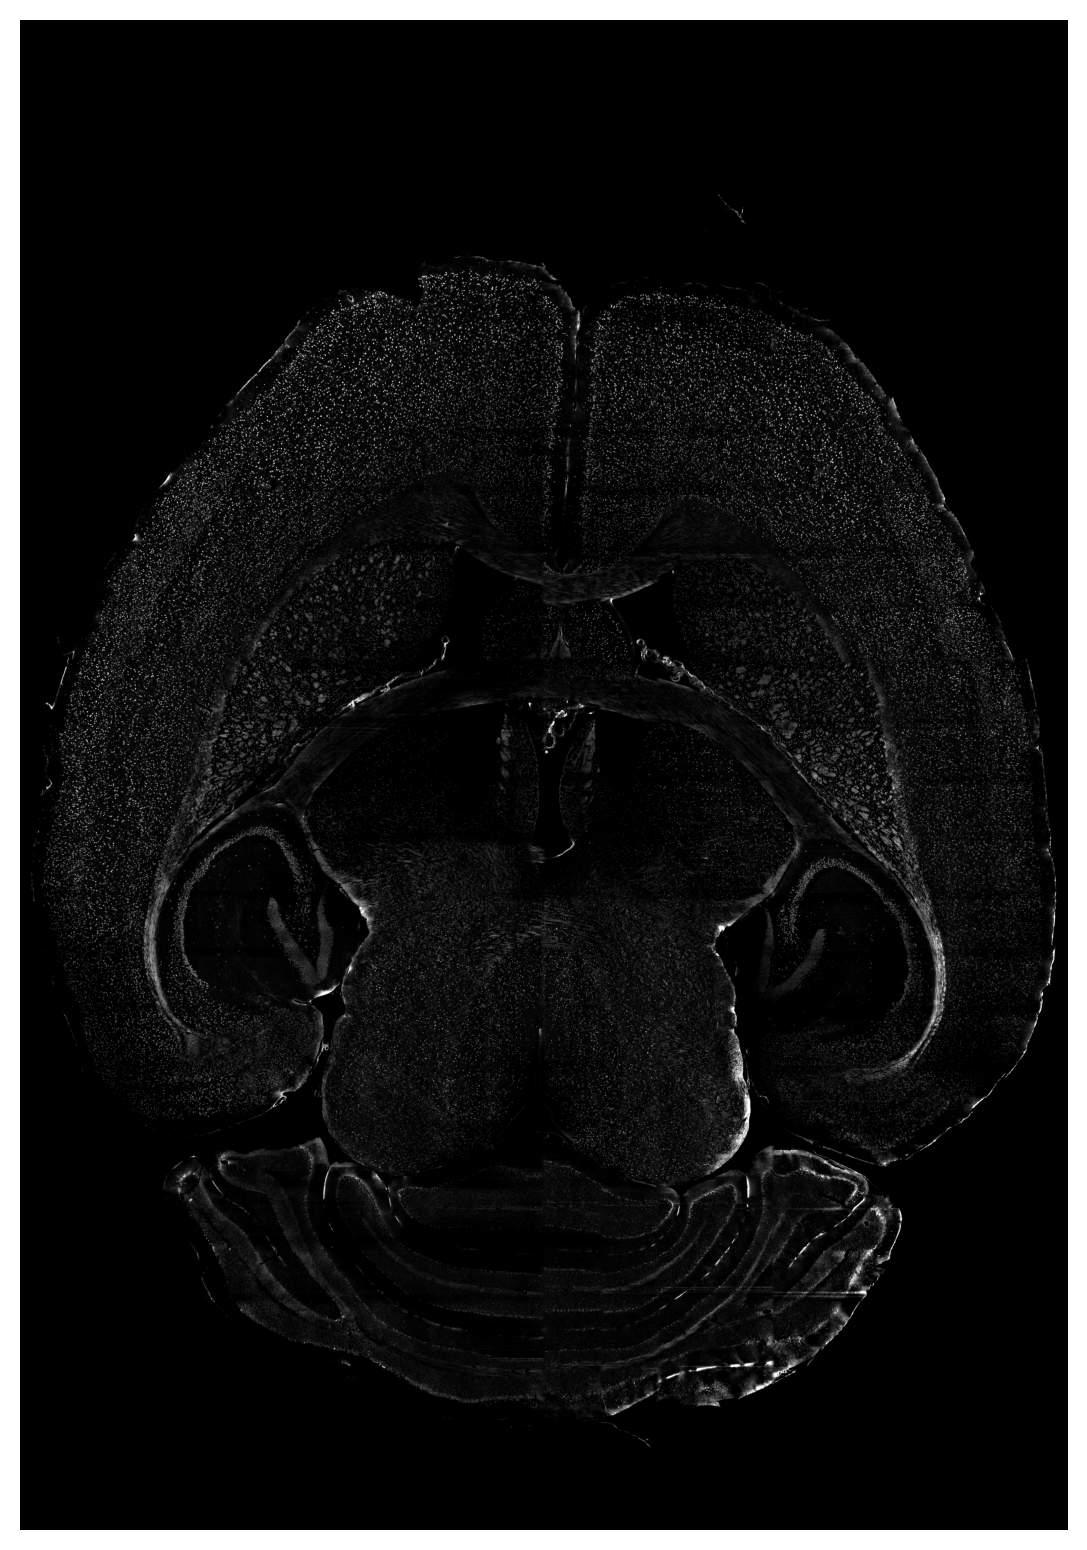

In [21]:
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

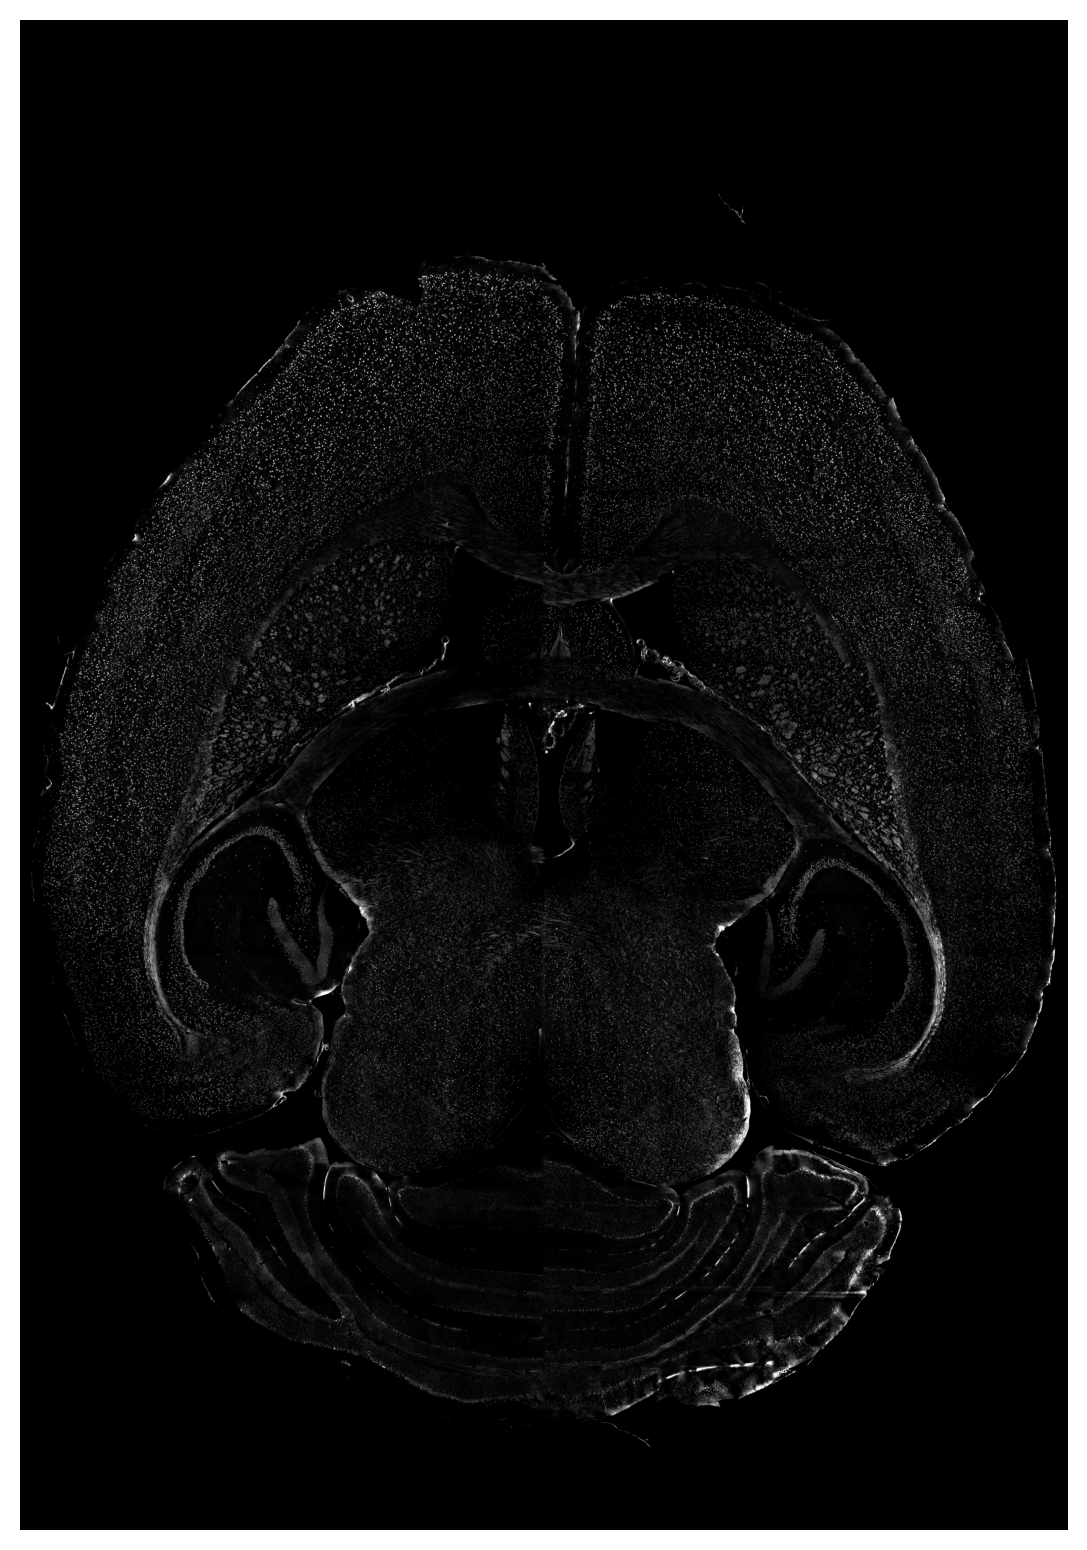

In [22]:
img1_destriped = filter_streaks(img1, (128, 256), level=0, wavelet="db2", crossover=7, threshold=-1)
plt.imshow(img1_destriped, cmap='gray', vmin=0, vmax=255)
plt.show()

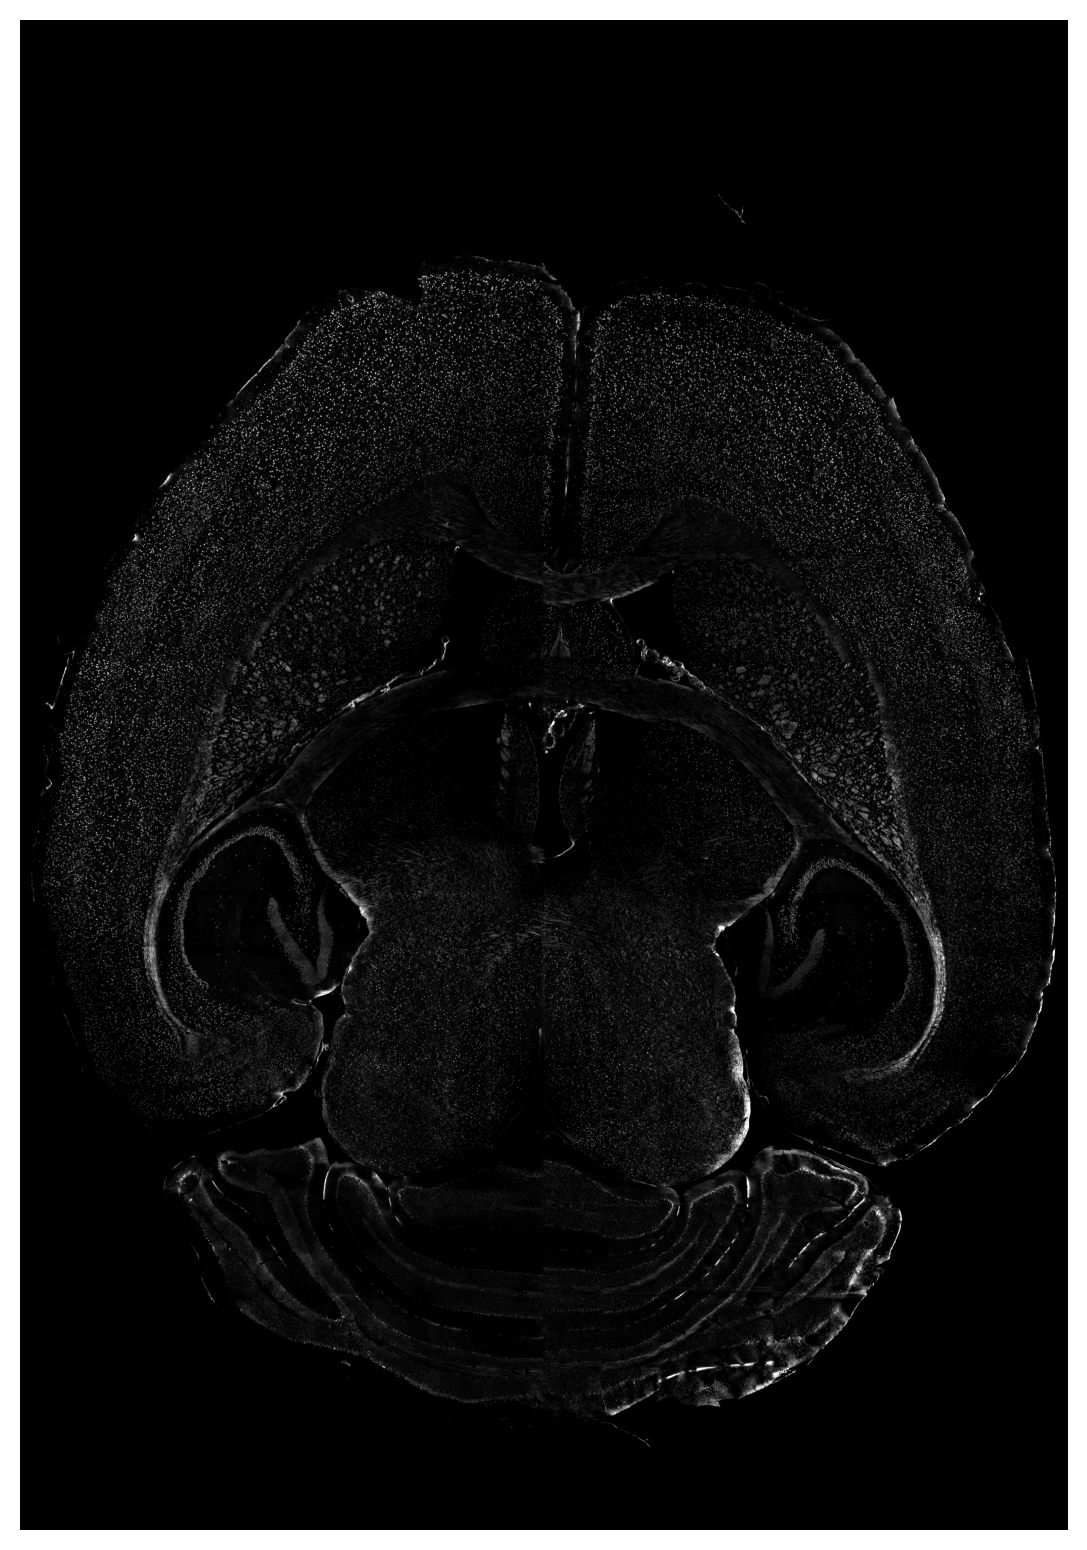

In [23]:
img1_destriped = filter_streaks(img1, (256, 256), level=0, wavelet="db10", crossover=10, threshold=-1)
plt.imshow(img1_destriped, cmap='gray', vmin=0, vmax=255)
plt.show()

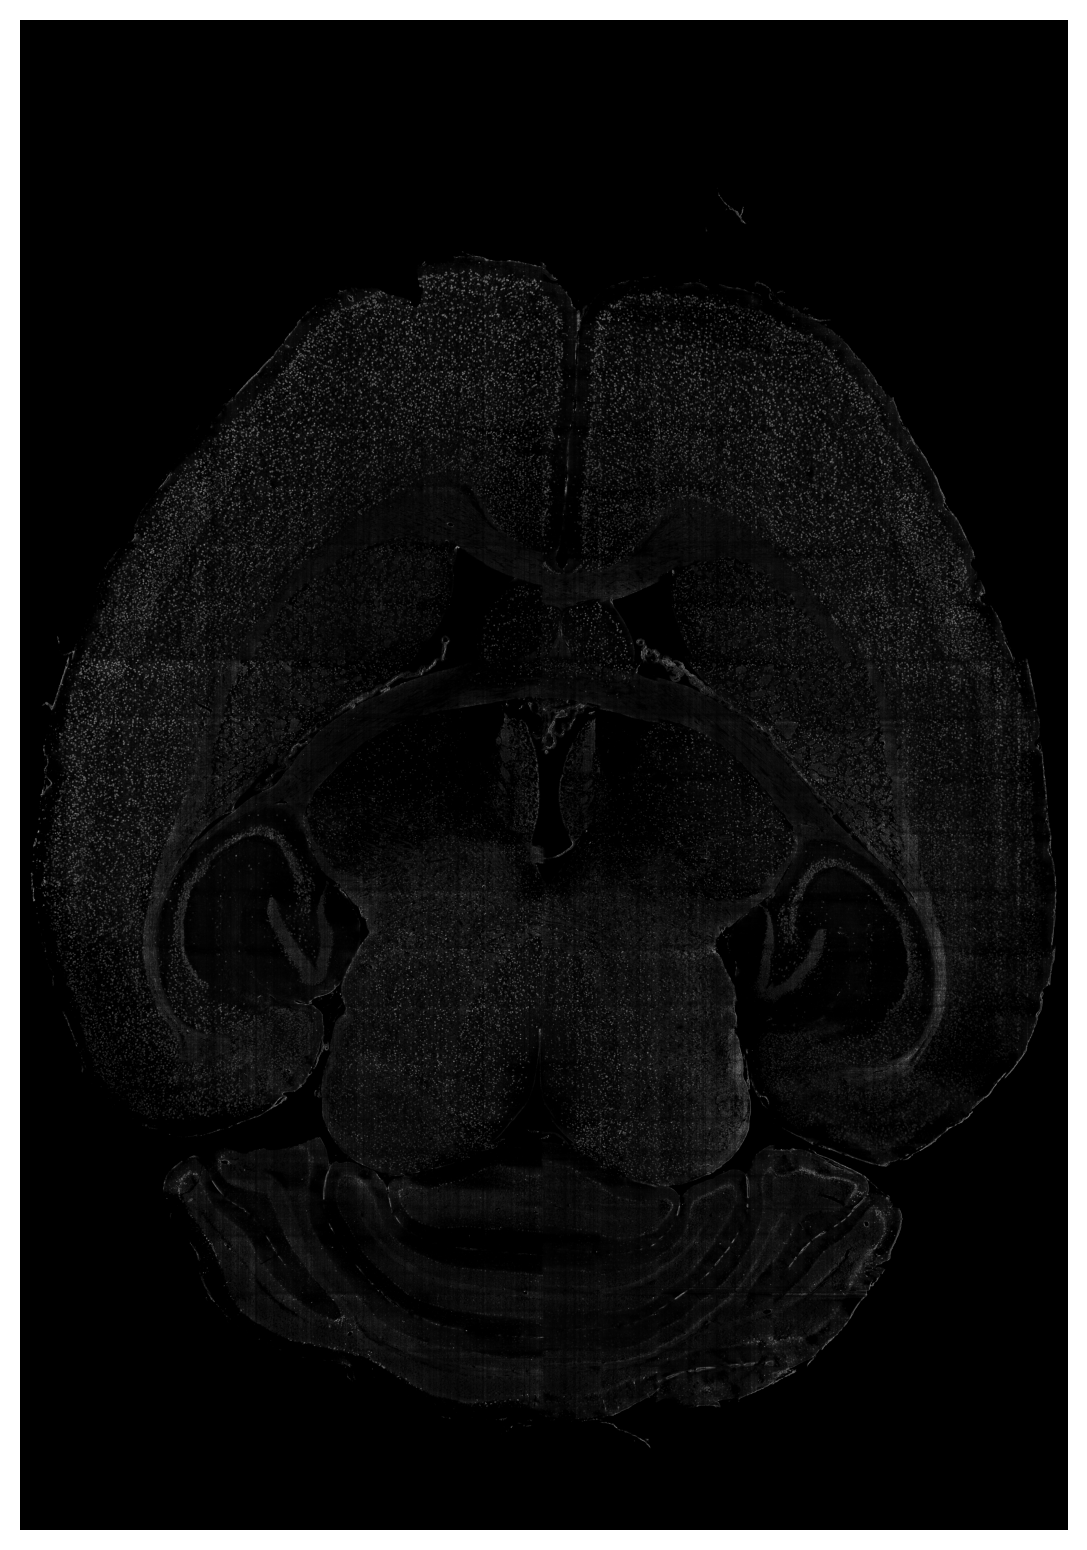

In [24]:
img1_destriped_sobel = minmax_scale(sobel(img1_destriped), feature_range=(0, 255))
plt.imshow(img1_destriped_sobel, cmap='gray', vmin=0, vmax=255)
plt.show()

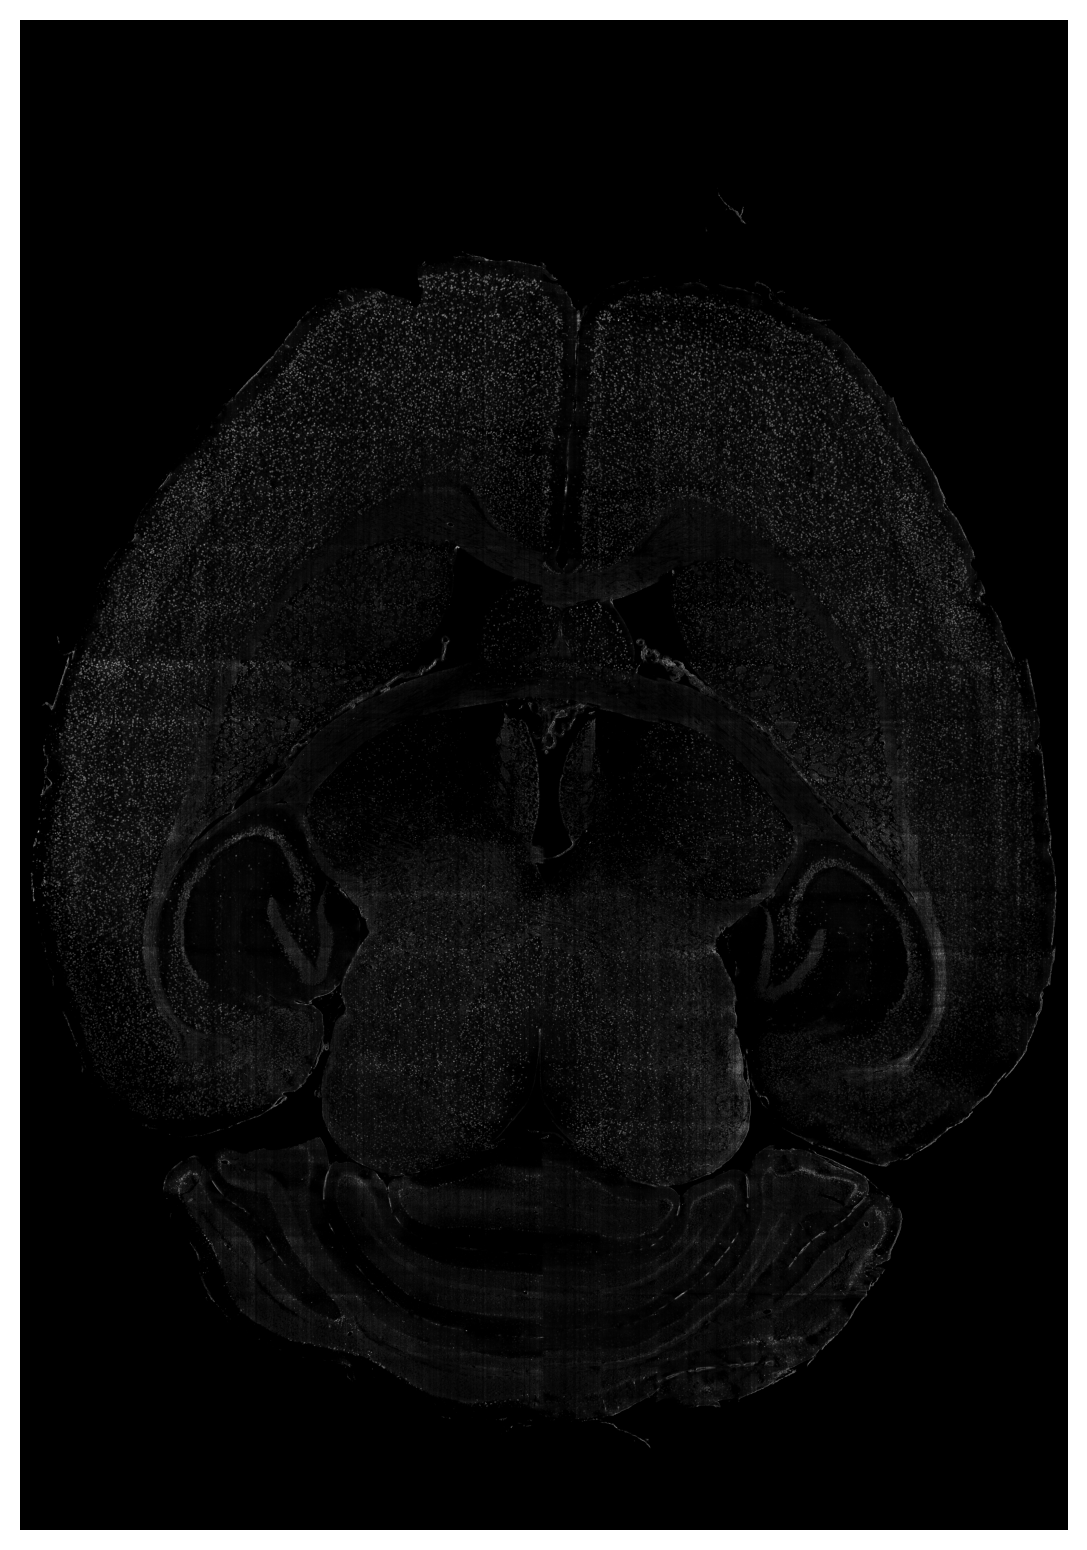

In [18]:
img1_destriped_sobel_destriped = filter_streaks(img1_destriped_sobel, (256, 256), level=0, wavelet="db10", crossover=10, threshold=-1)
plt.imshow(img1_destriped_sobel_destriped, cmap='gray', vmin=0, vmax=255)
plt.show()